In [1]:
!pip install dalex --quiet
!pip install alibi --quiet
!pip install shap --quiet
!pip install lime --quiet

     |████████████████████████████████| 1.0 MB 2.1 MB/s 
     |████████████████████████████████| 472 kB 2.1 MB/s 
     |████████████████████████████████| 4.9 MB 51.6 MB/s 
     |████████████████████████████████| 98.5 MB 97 kB/s 
     |████████████████████████████████| 163 kB 71.1 MB/s 
     |████████████████████████████████| 6.6 MB 38.4 MB/s 
     |████████████████████████████████| 569 kB 2.1 MB/s 
     |████████████████████████████████| 275 kB 2.4 MB/s 


# Understand the standard tools for model explainability

## Background


> Model explainability is a major issue for certain sectors such as insurance or banking in the validation and production of developed models. In certain situations, you will not only have to perform well but also be able to justify the decisions made by your model and explain the results. 
>
> Let's take a concrete case from everyday life: the purchase of a property. Hélène wants to become the happy owner of an apartment in Paris, so she applies for a loan from her bank. A Data Scientist has recently developed, in collaboration with a Data Engineer, an application available to bank agents that is able to predict whether or not it is profitable to grant the loan, based on a few characteristics such as the person's gender. Hélène is refused a loan and surprised by the decision, she asks her bank for an explanation, which she is obliged to provide by detailing the strengths and weaknesses of Hélène's file. The bank must therefore be able to explain to Hélène which characteristics weighed positively and especially negatively in the rejection of her loan. This requires the data scientist to provide at least some figures or a graphical interface explaining the local situation of Helen. We will show that it is possible to use simple tools to answer this question. 
> 
> Behind the question of explaining the model's decision to Hélène are several issues, including :
>* Fairness: Ensuring that predictions are unbiased and do not implicitly or explicitly discriminate against underrepresented groups. An interpretable model can tell you why it has decided that a certain person should not get a loan, and it becomes easier for a human to judge whether the decision is based on a learned demographic (e.g. racial) bias.
>* Privacy: Ensuring that sensitive information in the data is protected.
>* Reliability or Robustness: Ensuring that small changes in the input do not lead to large changes in the prediction.
>* Causality: Check that only causal relationships are picked up.
>* Trust: It is easier for humans to trust a system that explains its decisions compared to a black box.
> 
> Explainability aims to respond to these challenges and to bring confidence to the data scientists who model, to the businesses or to the users who use the model. It is a crucial point so that the people for whom you create the data product accept it and use it on a daily basis. 

## Model-specific or model-agnostic

> Model-specific interpretation tools are limited to specific model classes. The interpretation of regression weights in a linear model is a model-specific interpretation, since – by definition – the interpretation of intrinsically interpretable models is always model-specific. Tools that only work for the interpretation of e.g. neural networks are model-specific. Model-agnostic tools can be used on any machine learning model and are applied after the model has been trained (post hoc). These agnostic methods usually work by analyzing feature input and output pairs. By definition, these methods cannot have access to model internals such as weights or structural information.
>
> The interpretation tools specific to the models may contradict each other depending on the specific criterion studied.

## Local vs Global

> When we talk about explainability, it is possible to try to explain the decision of the model for a particular individual or the global behavior of the model. The first option can for example help us to understand the errors of the model for a restricted group of observations, the second option to detect biases. 
> 
> Example realized on the **`housing.csv`** dataset.

In [2]:
import pandas as pd

from utils import prepared_housing

housing = pd.read_csv("housing.csv")

X_train_prepared, X_test_prepared, y_train, y_test = prepared_housing(housing)

In [ ]:
X_train_prepared

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.33     38.38                28.0       1020.0           169.0   
1        -118.60     34.26                18.0       6154.0          1070.0   
2        -118.21     34.07                47.0       1346.0           383.0   
3        -118.02     33.96                36.0       2071.0           398.0   
4        -118.20     34.08                49.0       1320.0           309.0   
...          ...       ...                 ...          ...             ...   
16507    -118.10     33.91                36.0        726.0           438.0   
16508    -117.24     33.37                14.0       4687.0           793.0   
16509    -121.76     37.33                 5.0       4153.0           719.0   
16510    -122.44     37.78                44.0       1545.0           334.0   
16511    -119.08     36.21                20.0       1911.0           389.0   

       population  households  median_income  rooms_per_household  \
0           504.0       164.0         4.5694             6.219512   
1          3010.0      1034.0         5.6392             5.951644   
2          1452.0       371.0         1.7292             3.628032   
3           988.0       404.0         4.6226             5.126238   
4          1405.0       328.0         2.4375             4.024390   
...           ...         ...            ...                  ...   
16507       490.0       130.0         3.6389             5.584615   
16508      2436.0       779.0         4.5391             6.016688   
16509      2435.0       697.0         5.6306             5.958393   
16510       561.0       326.0         3.8750             4.739264   
16511      1241.0       348.0         2.5156             5.491379   

       population_per_household  bedrooms_per_room  ocean_proximity_<1H OCEAN  \
0                      3.073171           0.165686                        0.0   
1                      2.911025           0.173871                        1.0   
2                      3.913747           0.284547                        1.0   
3                      2.445545           0.192178                        1.0   
4                      4.283537           0.234091                        1.0   
...                         ...                ...                        ...   
16507                  3.769231           0.603306                        1.0   
16508                  3.127086           0.169191                        1.0   
16509                  3.493544           0.173128                        1.0   
16510                  1.720859           0.216181                        0.0   
16511                  3.566092           0.203558                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         1.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   
...                       ...                     ...   
16507                     0.0                     0.0   
16508                     0.0                     0.0   
16509                     0.0                     0.0   
16510                     0.0                     0.0   
16511                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                           0.0                         0.0  
1                           0.0                         0.0  
2                           0.0                         0.0  
3                           0.0                         0.0  
4                           0.0                         0.0  
...                         ...                         ...  
16507                       0.0                         0.0  
16508                       0.0                         0.0  
16509        

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

clf_gb = GradientBoostingRegressor(n_estimators = 250, max_depth=12, random_state=1234)
clf_rf = RandomForestRegressor(n_estimators = 250, max_depth=12, random_state=1234)

clf_gb.fit(X_train_prepared, y_train)
clf_rf.fit(X_train_prepared, y_train)

print("GradientBoosting score on train :", clf_gb.score(X_train_prepared, y_train))
print("RandomForest score on train :", clf_rf.score(X_train_prepared, y_train))

print("GradientBoosting score on test :", clf_gb.score(X_test_prepared, y_test))
print("RandomForest score on test :", clf_rf.score(X_test_prepared, y_test))

GradientBoosting score on train : 0.9997008408178584
RandomForest score on train : 0.911182100497389
GradientBoosting score on test : 0.8396324863281299
RandomForest score on test : 0.8148700603745143


## Partial Dependence Plot (PDP)

> The partial dependence plot is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome.
>
> The partial function $\hat{f}_{s}$ is estimated by calculating averages in the training data, also known as Monte Carlo method:
> <center> $\hat{f}_{s}(x_s)=\frac{1}{n}\sum_{i=1}^{n}\hat{f}(x_s, x_c^{(i)})$ </center>
>
> The partial function tells us for given value(s) of features S what the average marginal effect on the prediction is. In this formula, $x_c^{(i)}$ are actual feature values from the dataset for the features in which we are not interested, and n is the number of instances in the dataset. An assumption of the PDP is that the features in C are not correlated with the features in S. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible.

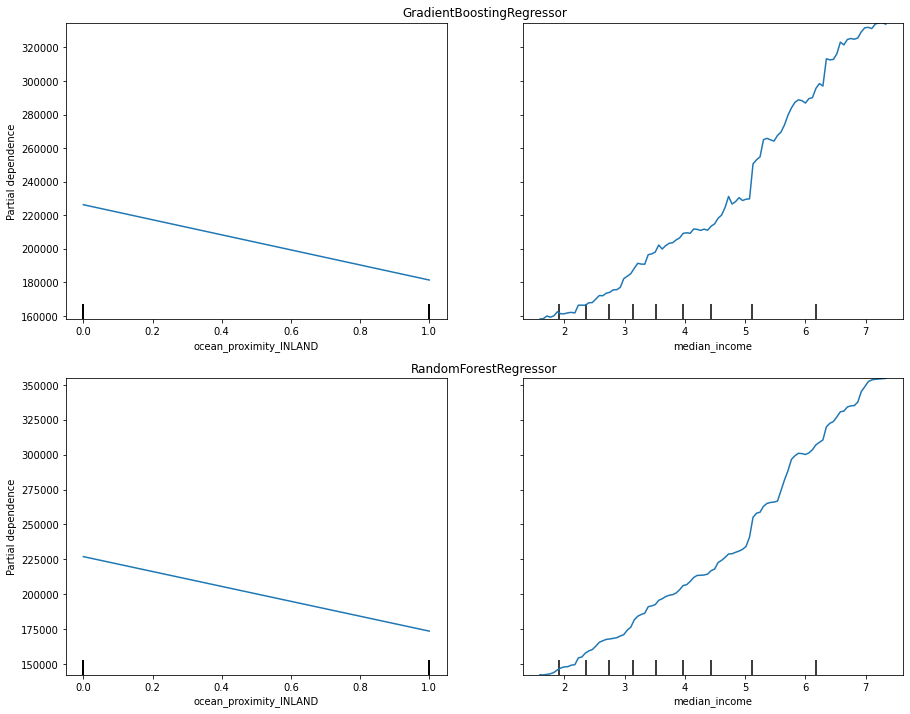

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


def plot_pdp(var1, var2):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    ax1.set_title("GradientBoostingRegressor")
    disp1 = PartialDependenceDisplay.from_estimator(
        clf_gb, X_train_prepared, [var1, var2], method="brute", ax=ax1
    )

    ax2.set_title("RandomForestRegressor")
    disp2 = PartialDependenceDisplay.from_estimator(
        clf_rf, X_train_prepared, [var1, var2], method="brute", ax=ax2
    )


plot_pdp("ocean_proximity_INLAND", "median_income")

In [ ]:
from sklearn.inspection import partial_dependence

partial_dependence(clf_gb, features=["median_income"], X=X_train_prepared, method='brute') 

(array([[158165.50020217, 158454.48839134, 160014.15409689,
         159293.2484987 , 160144.5149168 , 162554.07182972,
         161277.9909353 , 161325.74838963, 161912.40551507,
         162151.09515634, 161809.97417942, 166439.31615546,
         166447.56925814, 166395.35421546, 167885.96373097,
         167989.47747696, 170105.35621751, 172197.81443397,
         172076.56209061, 173588.09882837, 174114.93309924,
         175612.62630073, 175687.56007965, 177055.01084332,
         182257.43689399, 183681.50365549, 185178.58134065,
         188420.81731039, 191390.08768142, 190934.233935  ,
         190865.30347824, 196536.97613817, 197012.70769563,
         198074.64844577, 202287.99111259, 199922.52116048,
         201926.48911719, 203315.13577336, 203685.09159692,
         205340.71717115, 206572.8721504 , 209238.20008766,
         209588.31391928, 209293.01584083, 211824.84392876,
         211634.3733482 , 210988.09770905, 211767.96000152,
         211102.80787863, 213498.5536689

In [ ]:
partial_dependence(clf_gb, features=["ocean_proximity_INLAND"], X=X_train_prepared, method='brute') 

(array([[226313.24302141, 181436.90628105]]), [array([0., 1.])])

In [ ]:
import numpy as np

test_toy = X_train_prepared.copy()

def custom_pdp(var, value):
    test_toy[var] = value
    print(np.mean(clf_gb.predict(test_toy)))

custom_pdp('median_income', 1.59721)
custom_pdp('median_income', 1.65514664)
custom_pdp('median_income', 1.71308327)

158165.50020216824
158454.48839133946
160014.1540968887


In [ ]:
import dalex as dx

housing_gb_exp = dx.Explainer(clf_gb, X_train_prepared, y_train, 
                  label = "Housing gb")

pdp_gb = housing_gb_exp.model_profile(variables = ["ocean_proximity_INLAND", 'median_income'])
pdp_gb.plot()

Preparation of a new explainer is initiated

  -> data              : 16512 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 16512 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Housing gb
  -> predict function  : <function yhat_default at 0x7f26757e80e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.48e+04, mean = 2.07e+05, max = 5.02e+05
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.42e+04, mean = -1.21e-12, max = 1.6e+04
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


In [ ]:
pdp_gb.plot(geom="profiles")

## Permutation Importance

> The permutation feature importance algorithm based on Fisher, Rudin, and Dominici (2018):
>
> Input: Trained model $\hat{f}$, feature matrix $X$, target vector $y$, error measure $L(y,\hat{f})$ :
>* Estimate the original model error $L(y,\hat{f})$.
>* For each feature $j \in (1,...,p)$ do:
>** Generate feature matrix $X_{perm}$ by permuting feature j in the data X. This breaks the association between feature j and true outcome y.
>** Estimate error $L(y,\hat{f}(X_{perm}))$ based on the predictions of the permuted data.
>** Calculate permutation feature importance as difference $FI_j = L(y,\hat{f}) - L(y,\hat{f}(X_{perm}))$
>* Sort features by descending FI.


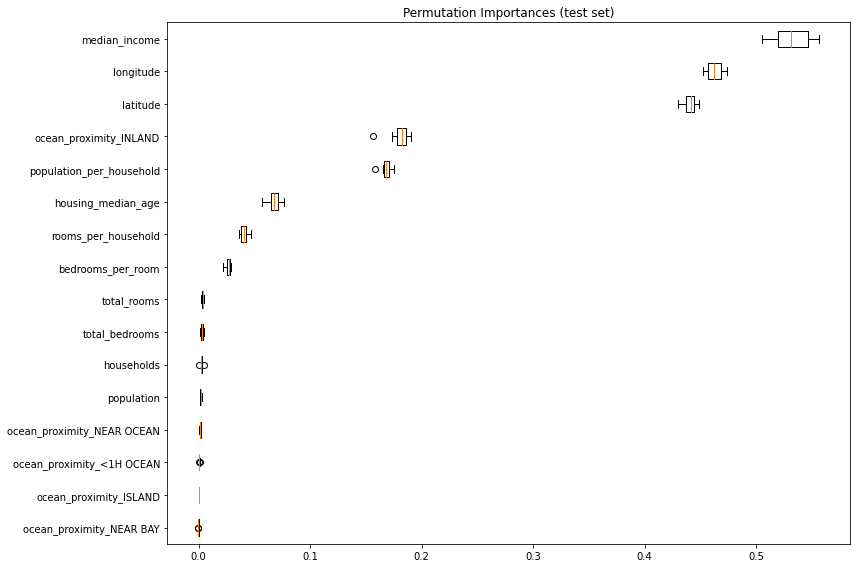

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf_gb, X_test_prepared, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_test_prepared.columns[sorted_idx],
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
import dalex as dx

housing_gb_exp = dx.Explainer(clf_gb, X_test_prepared, y_test, 
                  label = "Housing gb")

mp_gb = housing_gb_exp.model_parts(loss_function='rmse')
mp_gb.plot()

Preparation of a new explainer is initiated

  -> data              : 4128 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4128 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Housing gb
  -> predict function  : <function yhat_default at 0x7f26757e80e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.66e+04, mean = 2.07e+05, max = 5.32e+05
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.93e+05, mean = -7.84e+02, max = 3.39e+05
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
from sklearn.metrics import mean_squared_error

baseline = np.sqrt(mean_squared_error(y_test, clf_gb.predict(X_test_prepared)))

#example from scratch

np.random.seed(42)

test_toy = X_test_prepared.copy()

def custom_permutation(var):
    loss_list = []
    for i in range(30):
        test_toy[var] = np.random.permutation(test_toy[var])

        loss = np.sqrt(mean_squared_error(y_test, clf_gb.predict(test_toy)))
        var_diff = loss - baseline
        loss_list.append(var_diff)

    print(np.mean(loss_list))
    
custom_permutation('median_income')

49720.41610160049


## Accumulated Local Effects

> "Let me show you how the model predictions change in a small "window" of the feature around v for data instances in that window."
>
> Clear mathematical explanation : https://christophm.github.io/interpretable-ml-book/ale.html

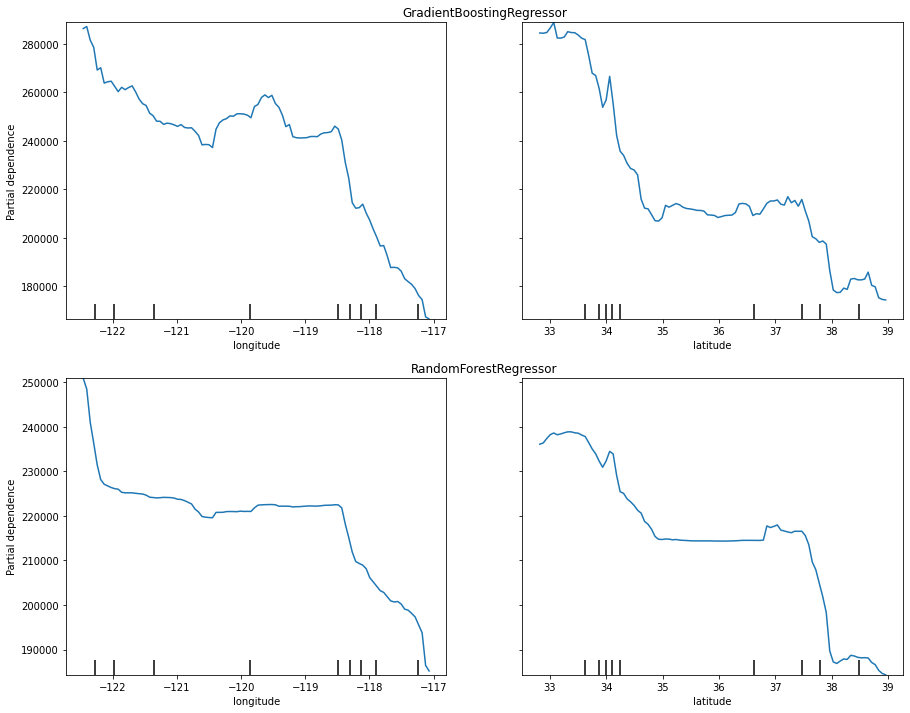

In [ ]:
plot_pdp("longitude", "latitude")

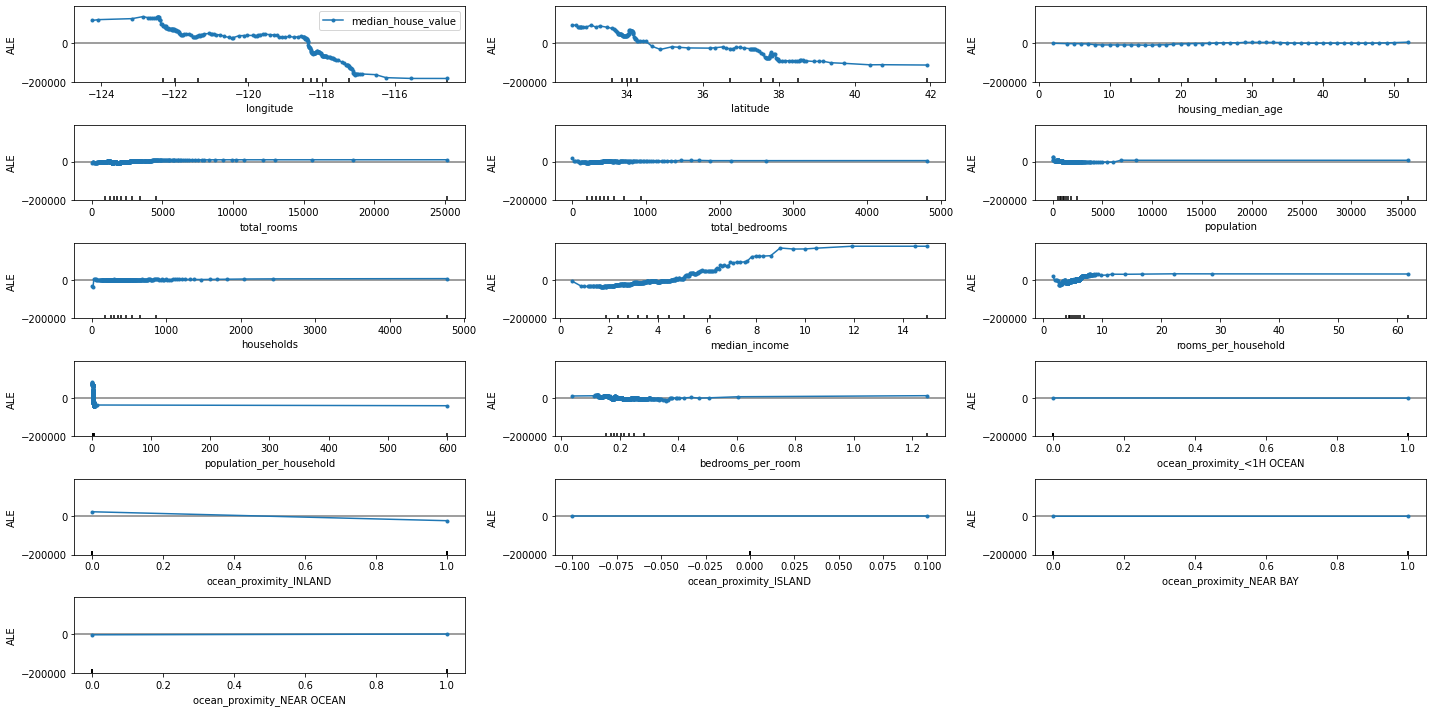

In [ ]:
#ALE plot test

from alibi.explainers import ALE, plot_ale

feature_names = X_test_prepared.columns
gb_ale = ALE(clf_gb.predict, feature_names=feature_names, target_names=["median_house_value"])

gb_exp = gb_ale.explain(np.array(X_test_prepared))

plot_ale(gb_exp, fig_kw={'figwidth':20, 'figheight': 10});

## LIME

> Intuition behind LIME : 
>* Select your instance of interest for which you want to have an explanation of its black box prediction.
>* Perturb your dataset and get the black box predictions for these new points.
>* Weight the new samples according to their proximity to the instance of interest.
>* Train a weighted, interpretable model on the dataset with the variations.
>* Explain the prediction by interpreting the local model.

In [ ]:
import lime
import lime.lime_tabular

cols_one_hot = [
    "ocean_proximity_<1H OCEAN",
    "ocean_proximity_INLAND",
    "ocean_proximity_ISLAND",
    "ocean_proximity_NEAR BAY",
    "ocean_proximity_NEAR OCEAN",
]

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_prepared.values,
    feature_names=X_train_prepared.columns,
    class_names=["price"],
    categorical_features=cols_one_hot,
    verbose=True,
    mode="regression",
)

i = 25
exp_gb = explainer.explain_instance(
    X_test_prepared.loc[i, :], clf_gb.predict, num_features=5
)
exp_rf = explainer.explain_instance(
    X_test_prepared.loc[i, :], clf_rf.predict, num_features=5
)

Intercept 163129.2499564666
Prediction_local [394327.996805]
Right: 424640.1540813713
Intercept 149046.5387670696
Prediction_local [371835.0006625]
Right: 434712.29892079526


In [ ]:
exp_gb.show_in_notebook(show_table=True)

In [ ]:
exp_rf.show_in_notebook(show_table=True)

In [ ]:
print("Explanation Local Prediction  : ", exp_rf.local_pred)
print("Explanation Global Prediction : ", exp_rf.predicted_value)

Explanation Local Prediction  :  [371835.0006625]
Explanation Global Prediction :  434712.29892079526


# SHAP

Shapley values are a concept of the cooperative game theory field, whose objective is to measure each player’s contribution to the game. The method for obtaining Shapley values was proposed by Lloyd Shapley [1] in 1953. Shapley values emerge from the context where “n” players participate collectively obtaining a reward “p” which is intended to be fairly distributed at each one of the “n” players according to the individual contribution, such a contribution is a Shapley value.

In simple words, a Shapley value is the average marginal contribution of an instance of a feature among all possible coalitions. Average marginal contribution? all possible coalitions? Let’s see in detail what all this refers to.

Let’s say that a group of friends (A , B , C , D ) is working together obtain a profit P . To distribute the profit fairly, it is intended to measure the contribution of each member, that is, the Shapley value of every friend. To calculate the Shapley value of a given member, the difference between the profit that is generated when the member is present is calculated with respect to the profit that is generated when that member is absent (such difference is the marginal contribution of the given member to the current coalition), this is done for each all the subgroups (or coalitions) that can be generated where the member for whom you are looking to calculate your contribution is present. The mean of the differences obtained (the mean marginal contribution) is the Shapley value.

In the following figure, we see a representation of the calculation of the marginal contribution of the friend A to the collation composed of friends B , C and D.

<img src="https://miro.medium.com/max/1400/1*m-4iY6YmKI5KCdVt4xF6sw.jpeg">

For example, to calculate the Shapley value of the friend A we would need to construct all the collations where the friend A appears, for each collation, the marginal contribution would be calculated (the difference between the profit obtained when the member is present versus the profit obtained when the member is absent) and given all marginal contributions, the mean marginal contribution would be calculated, that is, the Shapley value. Simple, right?

<img src="https://miro.medium.com/max/1400/1*vwWijeEx898uoUyWOtAMaw.jpeg">


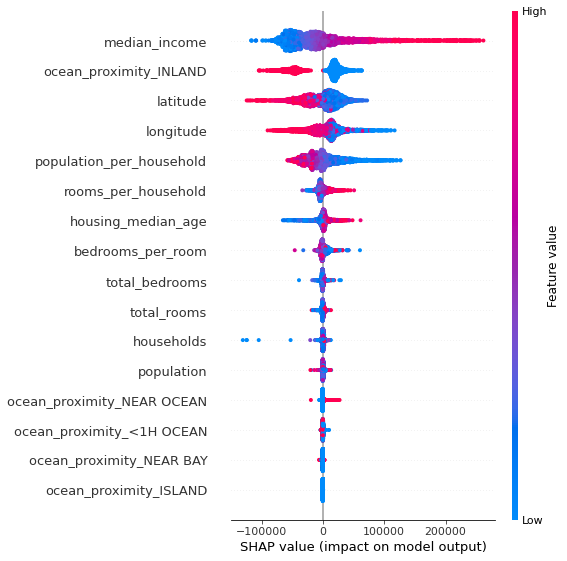

In [ ]:
import shap

explainer = shap.TreeExplainer(clf_gb)
shap_values = explainer.shap_values(X_test_prepared)

shap.summary_plot(shap_values, X_test_prepared)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_prepared.iloc[0,:])

> References : 
>
>* Dalex package : https://dalex.drwhy.ai/
>* Alibi package : https://github.com/SeldonIO/alibi
>* Shap package : https://github.com/slundberg/shap
>* Very useful book : https://christophm.github.io/interpretable-ml-book/
>*https://towardsdatascience.com/shap-shapley-additive-explanations-5a2a271ed9c3